In [1]:
pip install dask[dataframe]

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
import gdown
import requests
import dask.dataframe as dd


# Load environment variables from the .env file
load_dotenv()

# Function to construct Google Drive direct download link
def get_google_drive_url(file_id):
    return f"https://drive.google.com/uc?id={file_id}"

# Get file IDs from the .env file
file_ids = {
    "application_train": os.getenv("APPLICATION_TRAIN_ID"),
    "application_test": os.getenv("APPLICATION_TEST_ID"),
    "bureau": os.getenv("BUREAU_ID"),
    "bureau_balance": os.getenv("BUREAU_BALANCE_ID"),
    "credit_card_balance": os.getenv("CREDIT_CARD_BALANCE_ID"),
    "installments_payments": os.getenv("INSTALLMENTS_PAYMENTS_ID"),
    "previous_application": os.getenv("PREVIOUS_APPLICATION_ID"),
    "POS_CASH_balance": os.getenv("POS_CASH_BALANCE_ID"),
}

# Construct direct download links
google_drive_links = {key: get_google_drive_url(value) for key, value in file_ids.items()}

# Function to download a file using gdown, only if not already downloaded
def download_csv(file_url, output_path):
    if not os.path.exists(output_path):  # Check if file already exists
        print(f"Downloading {output_path}...")
        try:
            gdown.download(file_url, output_path, quiet=False)
            print(f"Downloaded {output_path}")
        except requests.exceptions.RequestException as e:
            print(f"Error downloading {file_url}: {e}")
    else:
        print(f"{output_path} already exists.")

# Define the output file paths
output_paths = {
    "application_train": "application_train.csv",
    "application_test": "application_test.csv",
    "bureau": "bureau.csv",
    "bureau_balance": "bureau_balance.csv",
    "credit_card_balance": "credit_card_balance.csv",
    "installments_payments": "installments_payments.csv",
    "previous_application": "previous_application.csv",
    "POS_CASH_balance": "POS_CASH_balance.csv"
}

# Download the datasets
for key, file_url in google_drive_links.items():
    download_csv(file_url, output_paths[key])

# Load datasets from local files
try:
    app_train = dd.read_csv(output_paths["application_train"], on_bad_lines='skip')
    app_test = dd.read_csv(output_paths["application_test"], on_bad_lines='skip')
    bureau = dd.read_csv(output_paths["bureau"], on_bad_lines='skip')
    bureau_balance = dd.read_csv(output_paths["bureau_balance"], on_bad_lines='skip')
    credit_card_balance = dd.read_csv(output_paths["credit_card_balance"], on_bad_lines='skip')
    installments_payments = dd.read_csv(output_paths["installments_payments"], on_bad_lines='skip')
    previous_application = dd.read_csv(output_paths["previous_application"], on_bad_lines='skip')
    POS_CASH_balance = dd.read_csv(output_paths["POS_CASH_balance"], on_bad_lines='skip')
except Exception as e:
    print(f"Error loading CSV files: {e}")

# Example: Print the first few rows of the application_train dataset
print(app_train.head())


application_train.csv already exists.
application_test.csv already exists.
bureau.csv already exists.
bureau_balance.csv already exists.
credit_card_balance.csv already exists.
installments_payments.csv already exists.
previous_application.csv already exists.
POS_CASH_balance.csv already exists.
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    1

In [5]:
train = app_train.copy()
test = app_test.copy()

In [5]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [8]:
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [9]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
credit_card_balance.columns.values


array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [11]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [13]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [14]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [15]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [17]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [18]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [19]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [20]:
print(train["TARGET"].value_counts())
print("Percentage: ")
print((train["TARGET"].value_counts()/train["TARGET"].count())*100)

0    282686
1     24825
Name: TARGET, dtype: int64
Percentage: 
0    91.927118
1     8.072882
Name: TARGET, dtype: float64


In [21]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


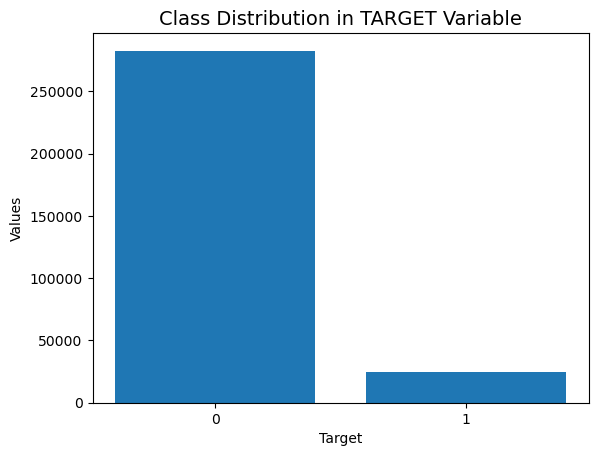

In [22]:
cnt = train['TARGET'].value_counts()
x = np.arange(len(cnt))
plt.title('Class Distribution in TARGET Variable', fontsize=14)
plt.bar(x, cnt)   
plt.xticks(x, [0,1])
plt.xlabel('Target')
plt.ylabel('Values')
plt.show()

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# data.isnull() returns a DataFrame of the same shape as data with boolean values: True where the data is missing 
# and False where the data is present

# data.isnull().sum() sums up the number of missing values (True values) for each column in the DataFrame.

# sort_values(ascending=False) sorts the columns by the number of missing values in descending order, 
# meaning the columns with the most missing values will appear at the top.

# percentage of missing values for each column.

In [7]:
missing_data(train).head(20)

# The statement missing_data(train).head(20) is calling the missing_data function on the train DataFrame, 
# which contains the training data, and then showing the first 20 rows of the result.

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [8]:
missing_data(bureau)


,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [9]:
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [10]:
missing_data(installments_payments)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


In [11]:
missing_data(previous_application).head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [12]:
# The main purpose of this function is to automatically clean the dataset by removing columns that have too many missing values, 
# which can be a common issue when working with large datasets. Dropping columns 
# with a high percentage of missing values can help improve model performance by reducing irrelevant or incomplete data.

def dropcols(data):
    threshold=0.6
    cols_to_drop = data.columns[data.isnull().mean() > threshold]
    data = data.drop(columns=cols_to_drop)
    return data.shape

# The function dropcols(data) is designed to drop columns from a dataset (pandas DataFrame) 
# that have a high proportion of missing values, specifically above a given threshold. 

# This sets the threshold for the proportion of missing values. Columns with more than 60% (0.6) missing values will be dropped. 
# You can change this threshold based on your needs.

# data.columns[data.isnull().mean() > threshold]: This selects the column names where the proportion of missing values is greater 
# than the threshold (in this case, 0.6 or 60%). These are the columns that will be dropped.

# This drops the columns identified as having more than 60% missing values from the DataFrame data. 
# The data.drop(columns=cols_to_drop) method removes these columns.


In [13]:
print(dropcols(train))

(307511, 105)


In [14]:
print(dropcols(test))

(48744, 104)


In [15]:
print(dropcols(bureau))

(1716428, 15)


In [16]:
print(dropcols(previous_application))

(1670214, 35)


In [17]:
def droprows(data):
    threshold = 0.6 
    rows_to_drop = data.index[data.isnull().mean(axis=1) > threshold] 
    data = data.drop(index=rows_to_drop) 
    return data.shape 

In [18]:
print(droprows(train))

(307511, 122)


In [19]:
def fill_missing(data):
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            data[column] = data[column].fillna(data[column].median())
        elif data[column].dtype == 'object' or data[column].nunique() < 3:
            data[column] = data[column].fillna(data[column].mode()[0])
    return data.head(10)


In [20]:
fill_missing(train)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
train.tail(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307491,456235,0,Cash loans,M,Y,Y,2,90000.0,1078200.0,31522.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,7.0
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307493,456237,0,Cash loans,F,N,Y,0,135000.0,946764.0,37678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,7.0
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307496,456240,0,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
307498,456242,0,Cash loans,M,Y,Y,0,198000.0,1312110.0,52168.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307499,456243,0,Cash loans,F,N,Y,0,81000.0,225000.0,12694.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0
307500,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


In [21]:
import pandas as pd
def remove_duplicates(df):
    unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
    df_without_unique = df.drop(columns=unique_columns)
    df_cleaned = df_without_unique.drop_duplicates()
    df_cleaned = pd.concat([df_cleaned, df[unique_columns]], axis=1)
    return df_cleaned


In [22]:
train=remove_duplicates(train)

In [23]:
print(train.shape)

(307511, 122)


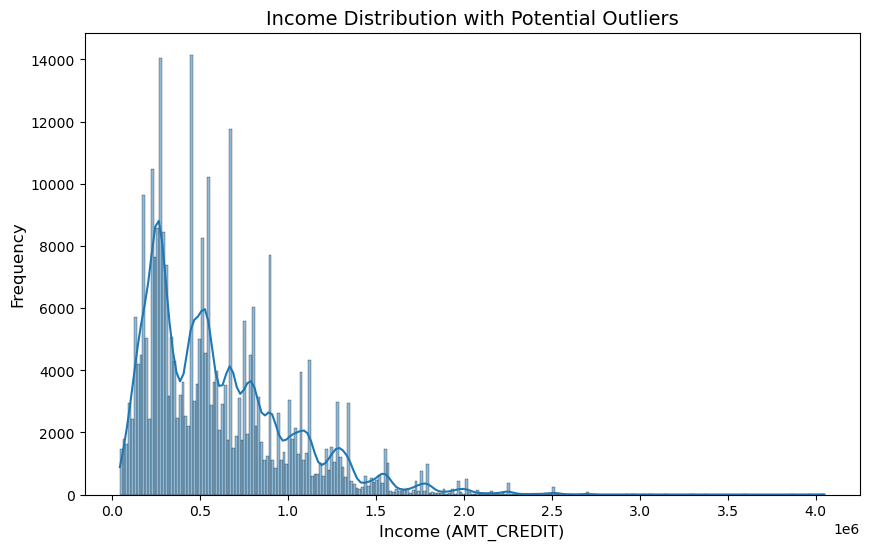

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(train['AMT_CREDIT'], kde=True)

plt.title('Income Distribution with Potential Outliers', fontsize=14)
plt.xlabel('Income (AMT_CREDIT)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

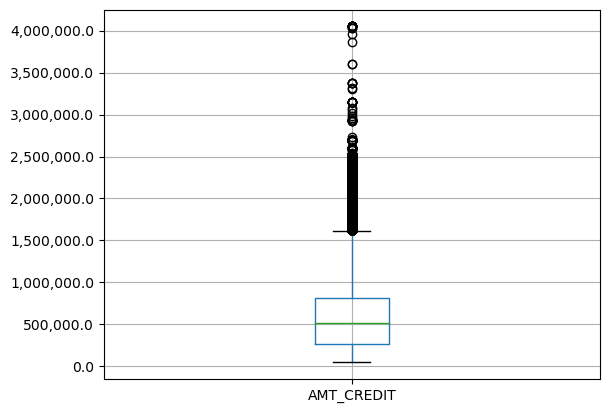

In [102]:
train.boxplot(column=['AMT_CREDIT'])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, ',')))
plt.show()

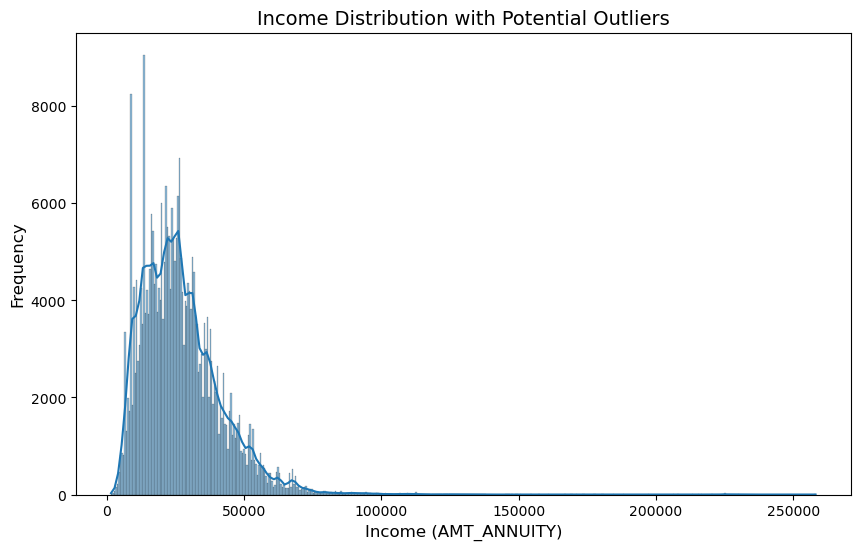

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(train['AMT_ANNUITY'], kde=True)

plt.title('Income Distribution with Potential Outliers', fontsize=14)
plt.xlabel('Income (AMT_ANNUITY)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

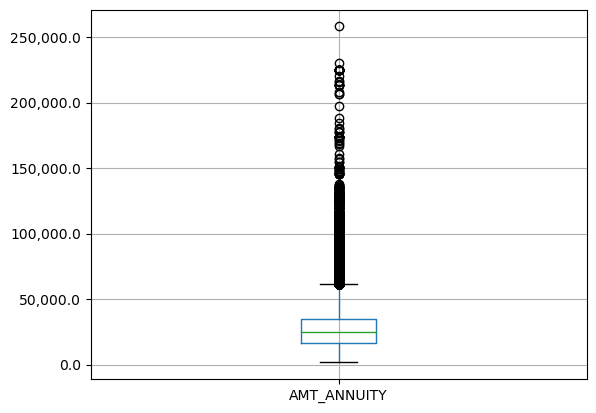

In [104]:
train.boxplot(column=['AMT_ANNUITY'])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, ',')))
plt.show()

In [20]:
import pandas as pd

Q1 = train['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = train['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -22500.0
Upper Bound: 337500.0


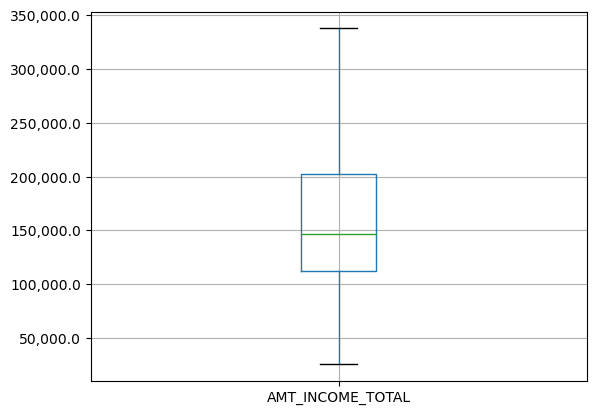

In [38]:
train['AMT_INCOME_TOTAL'] = train['AMT_INCOME_TOTAL'].clip(lower=lower_bound, upper=upper_bound)

train.boxplot(column=['AMT_INCOME_TOTAL'])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, ',')))
plt.show()

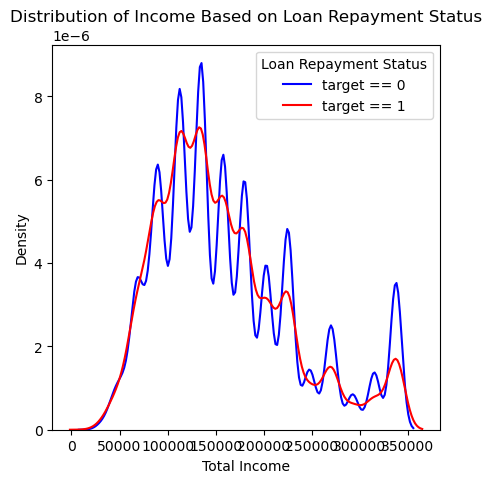

In [107]:
#KERNEL DENSITY PLOT
plt.figure(figsize=(5, 5))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'AMT_INCOME_TOTAL'], label='target == 0', color='blue')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'AMT_INCOME_TOTAL'], label='target == 1', color='red')

plt.xlabel('Total Income')
plt.ylabel('Density')
plt.title('Distribution of Income Based on Loan Repayment Status')
plt.legend(title="Loan Repayment Status")

plt.show()


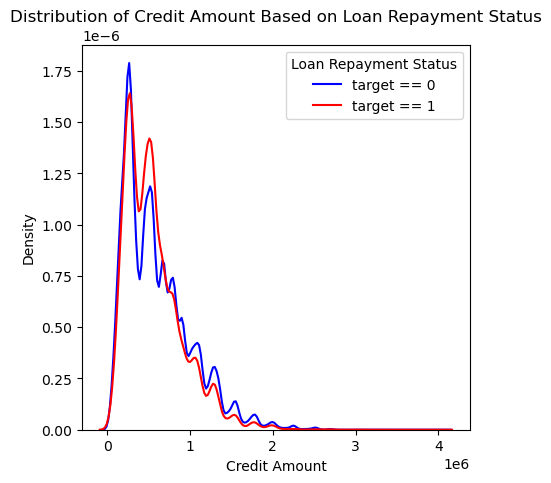

In [21]:
plt.figure(figsize=(5, 5))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'AMT_CREDIT'], label='target == 0', color='blue')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'AMT_CREDIT'], label='target == 1', color='red')

plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.title('Distribution of Credit Amount Based on Loan Repayment Status')
plt.legend(title="Loan Repayment Status")

plt.show()


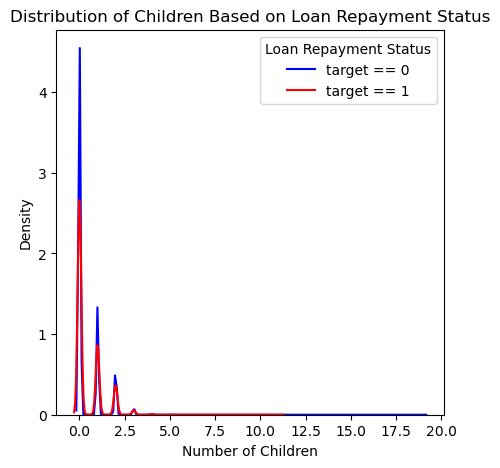

In [109]:
plt.figure(figsize=(5, 5))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'CNT_CHILDREN'], label='target == 0', color='blue')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'CNT_CHILDREN'], label='target == 1', color='red')

plt.xlabel('Number of Children')
plt.ylabel('Density')
plt.title('Distribution of Children Based on Loan Repayment Status')
plt.legend(title="Loan Repayment Status")

plt.show()


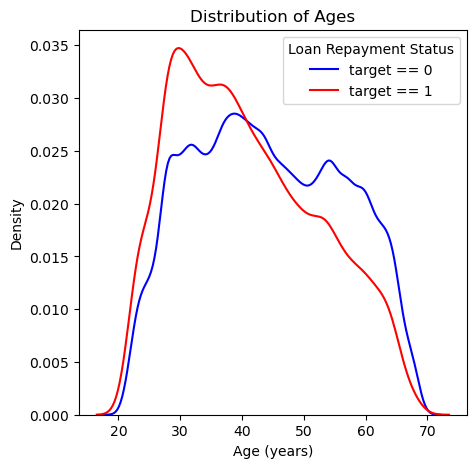

In [22]:

plt.figure(figsize=(5, 5))

train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target == 0', color='blue')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target == 1', color='red')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend(title="Loan Repayment Status")

plt.show()


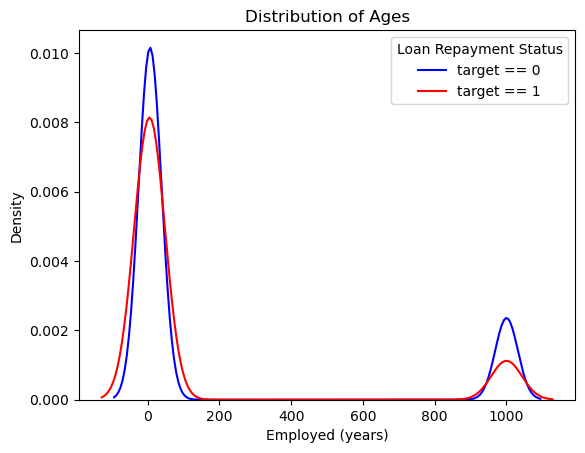

In [111]:
train['DAYS_EMPLOYED'] = abs(train['DAYS_EMPLOYED'])

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label='target == 0', color='blue')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label='target == 1', color='red')

plt.xlabel('Employed (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend(title="Loan Repayment Status")

plt.show()


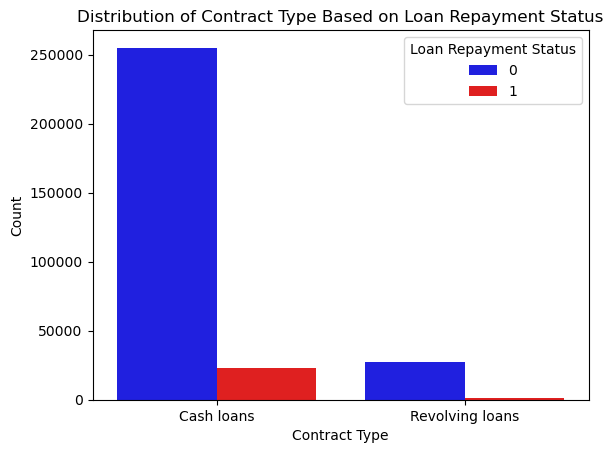

In [112]:
sns.countplot(data=train, x='NAME_CONTRACT_TYPE', hue='TARGET', palette=['blue', 'red'])

plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Type Based on Loan Repayment Status')
plt.legend(title="Loan Repayment Status", loc='upper right')

plt.show()


In [113]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    cat_perc = train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
        
    s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    s = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()


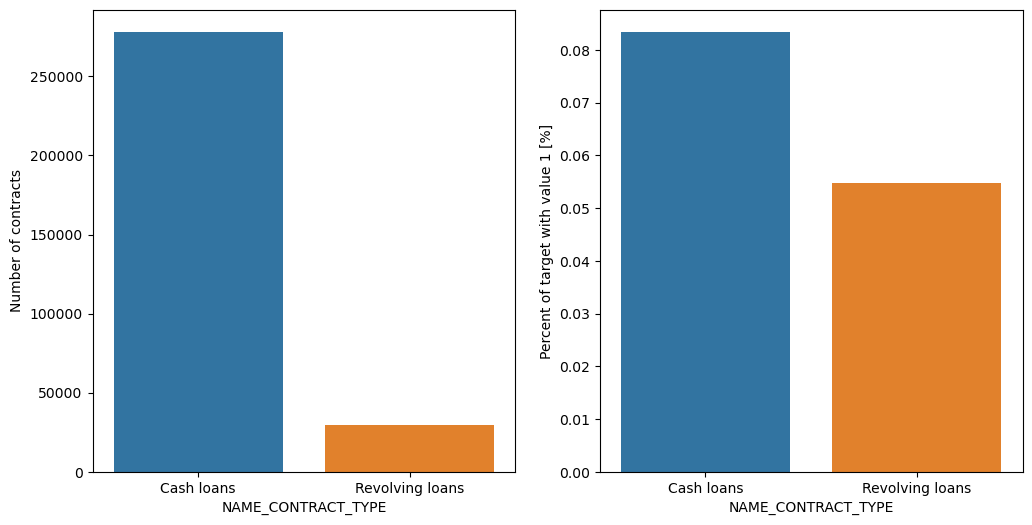

In [114]:
plot_stats('NAME_CONTRACT_TYPE')

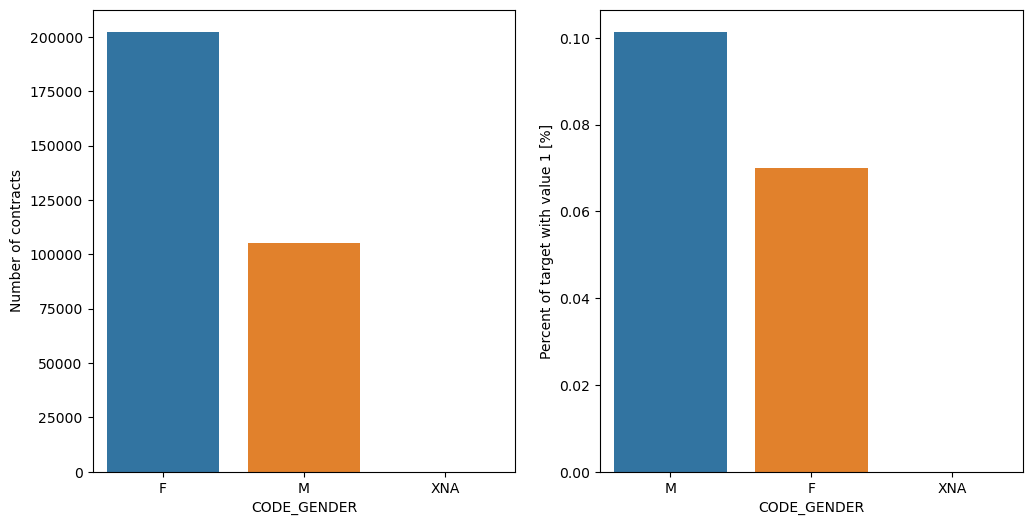

In [115]:
plot_stats('CODE_GENDER')

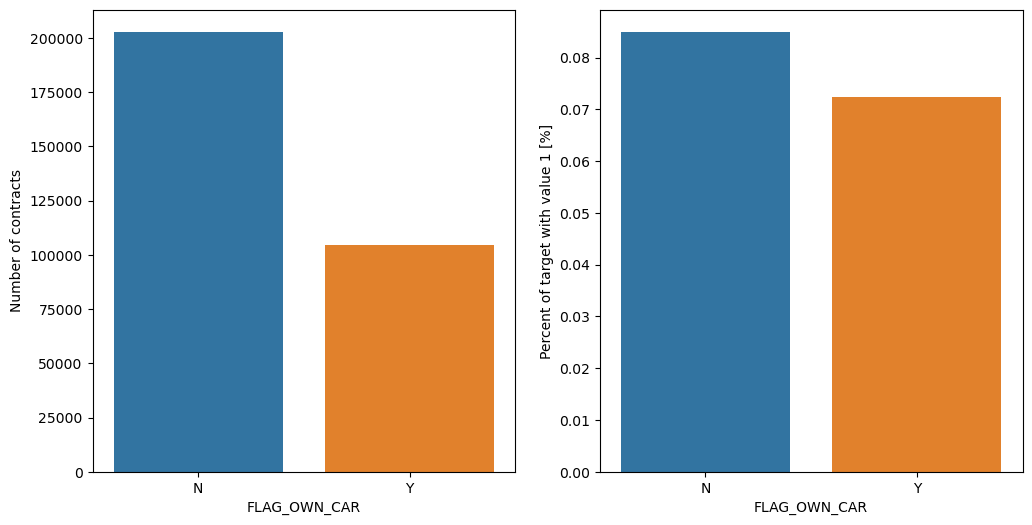

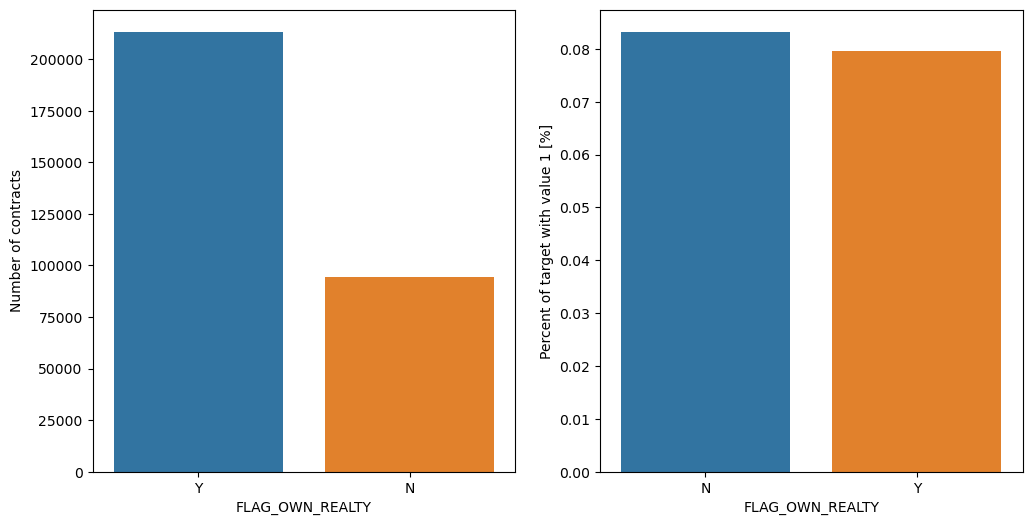

In [116]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

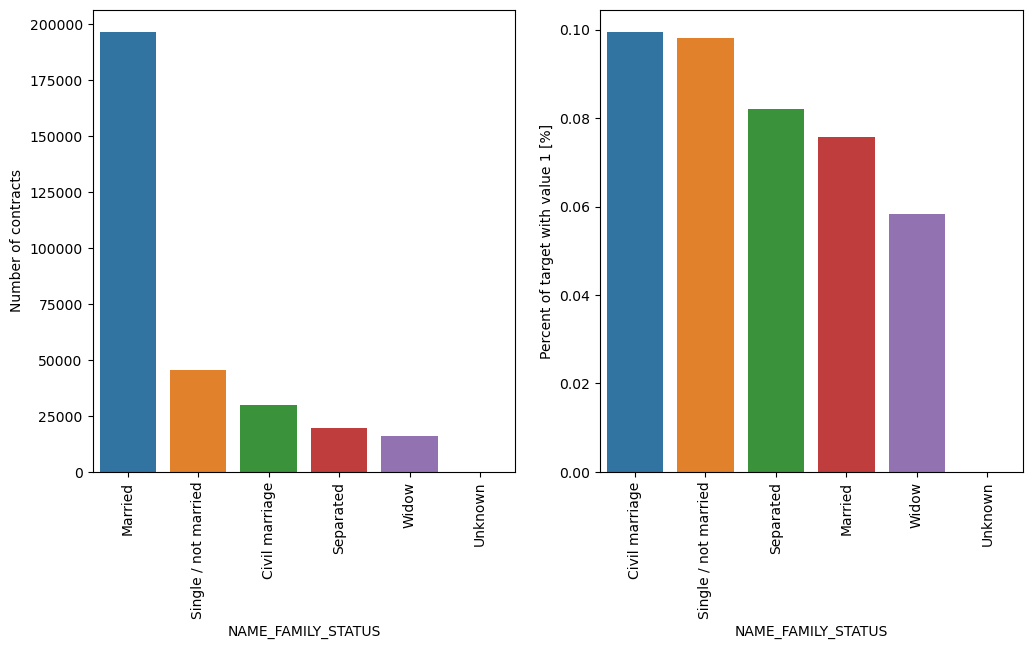

In [117]:
plot_stats('NAME_FAMILY_STATUS',True, True)

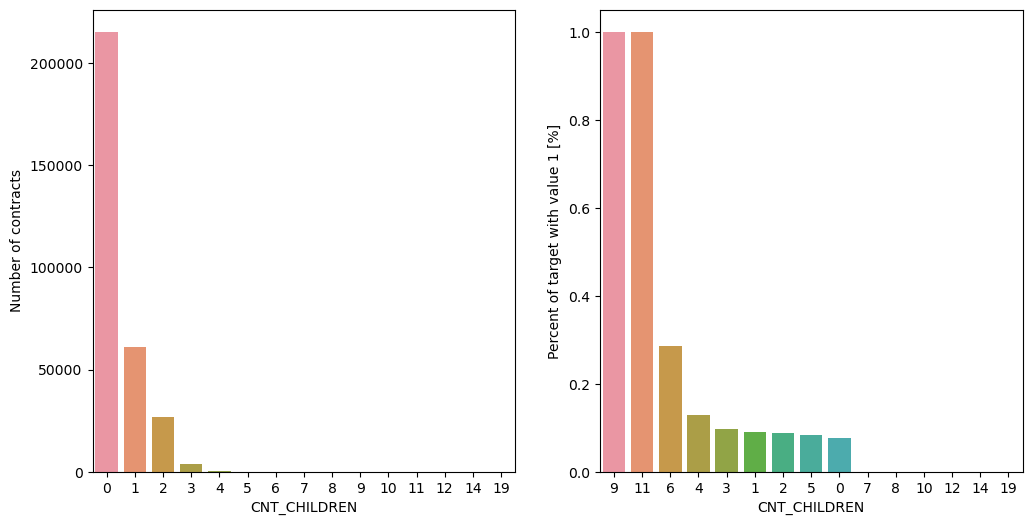

In [118]:
plot_stats('CNT_CHILDREN')

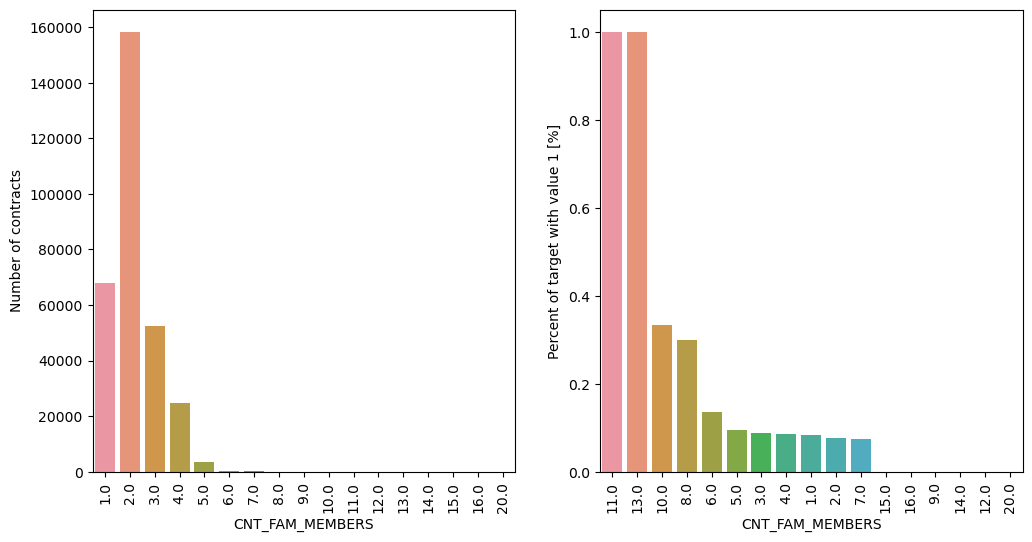

In [119]:
plot_stats('CNT_FAM_MEMBERS',True)

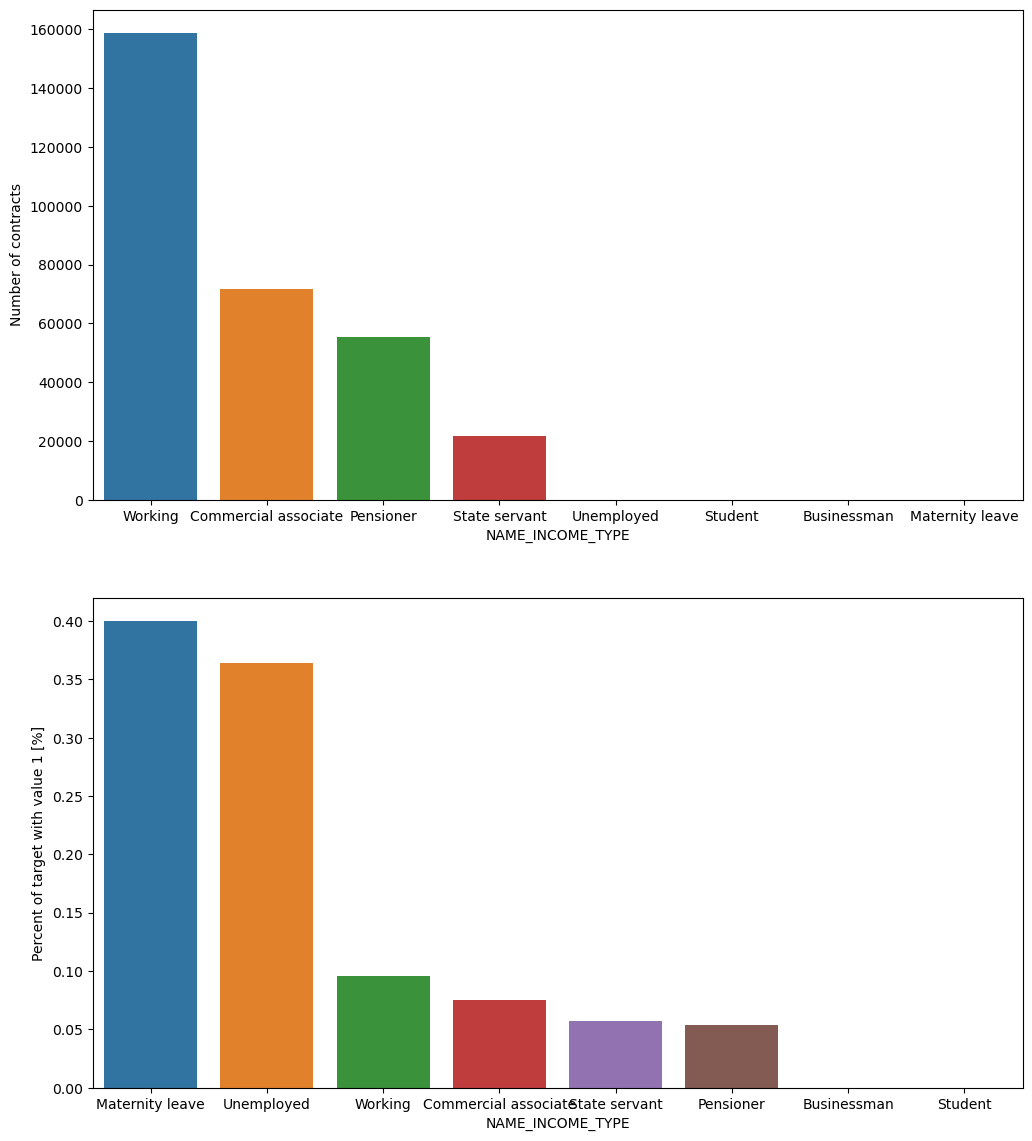

In [120]:
plot_stats('NAME_INCOME_TYPE',False,False)

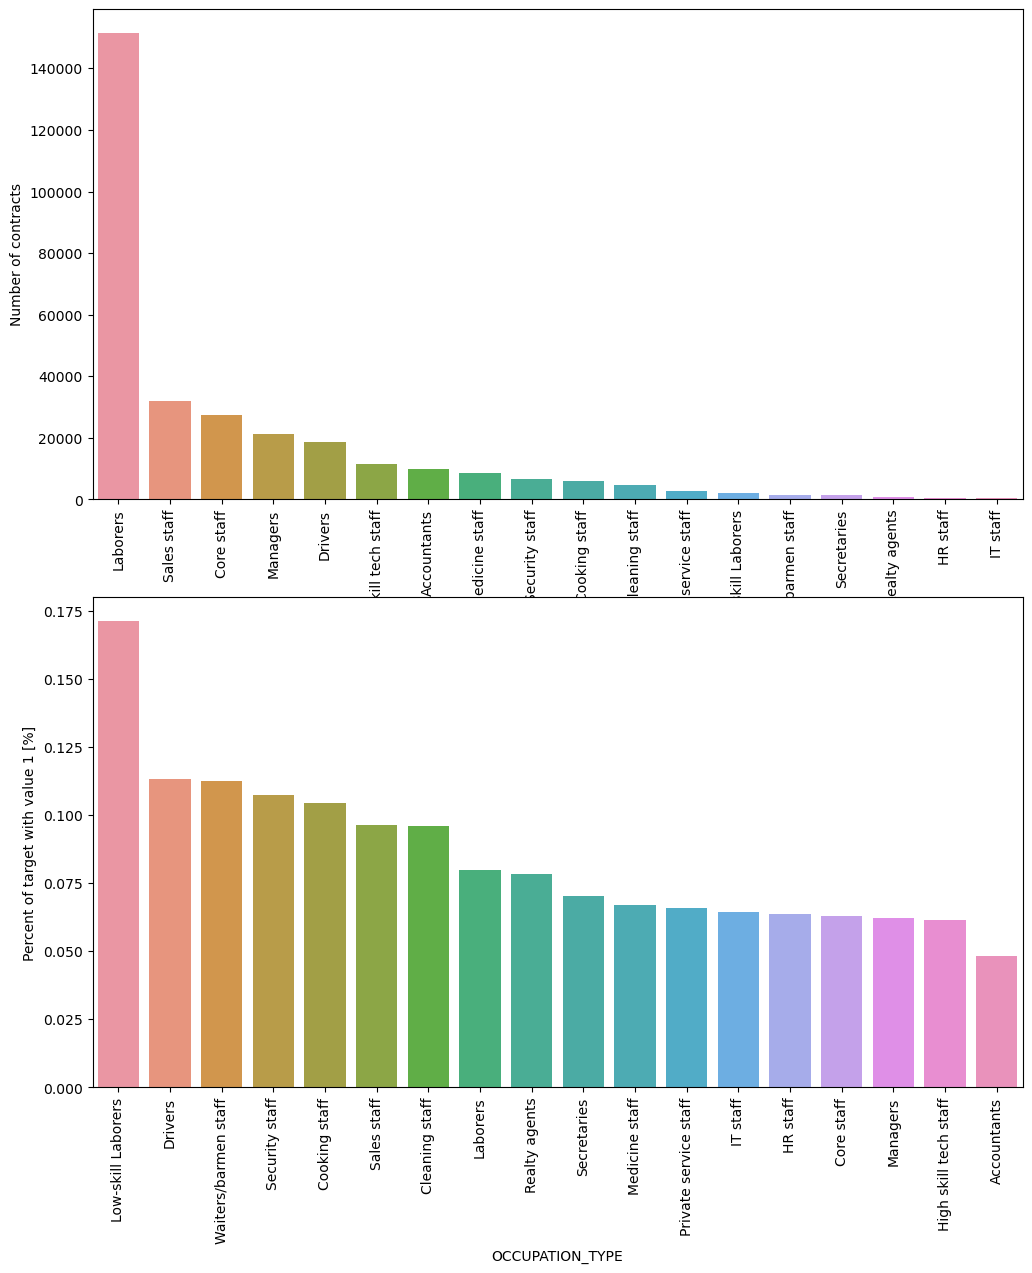

In [121]:
plot_stats('OCCUPATION_TYPE',True, False)

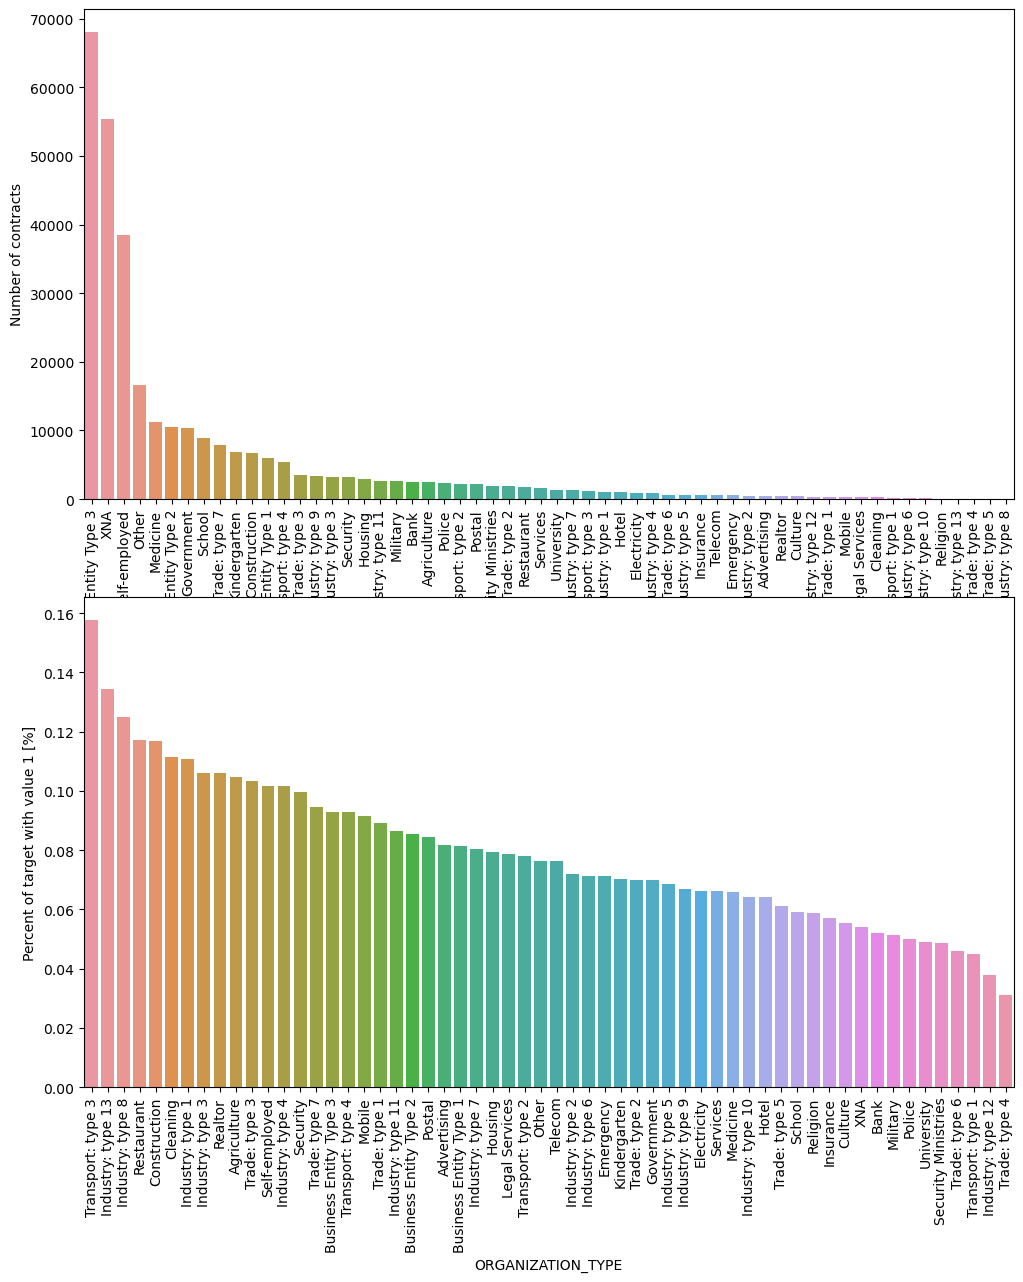

In [122]:
plot_stats('ORGANIZATION_TYPE',True, False)

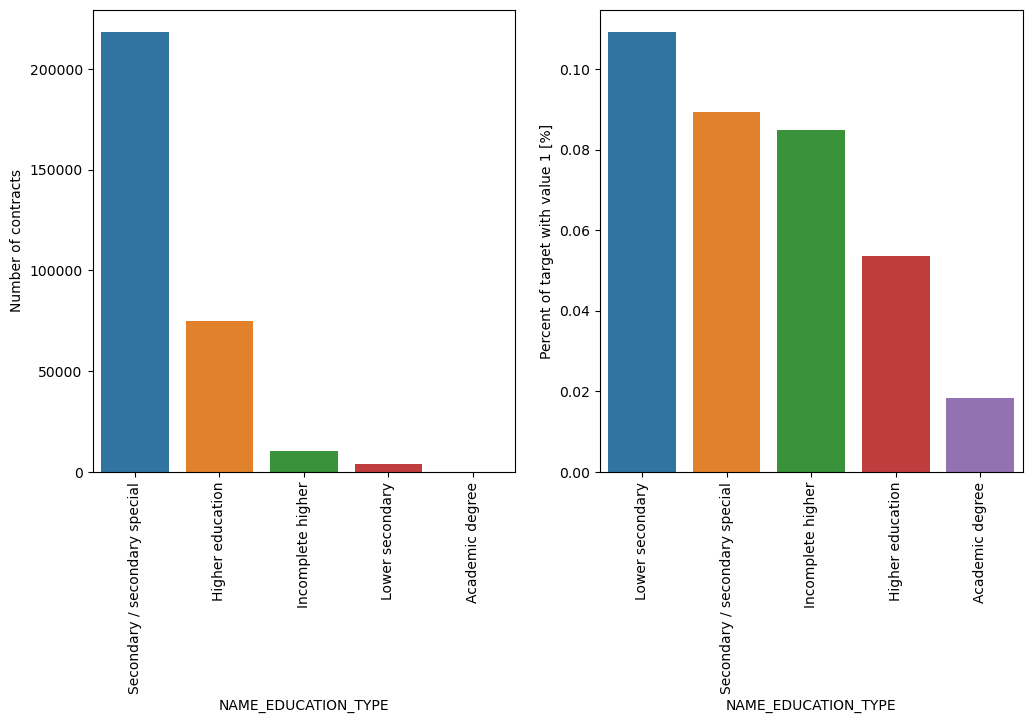

In [123]:
plot_stats('NAME_EDUCATION_TYPE',True)

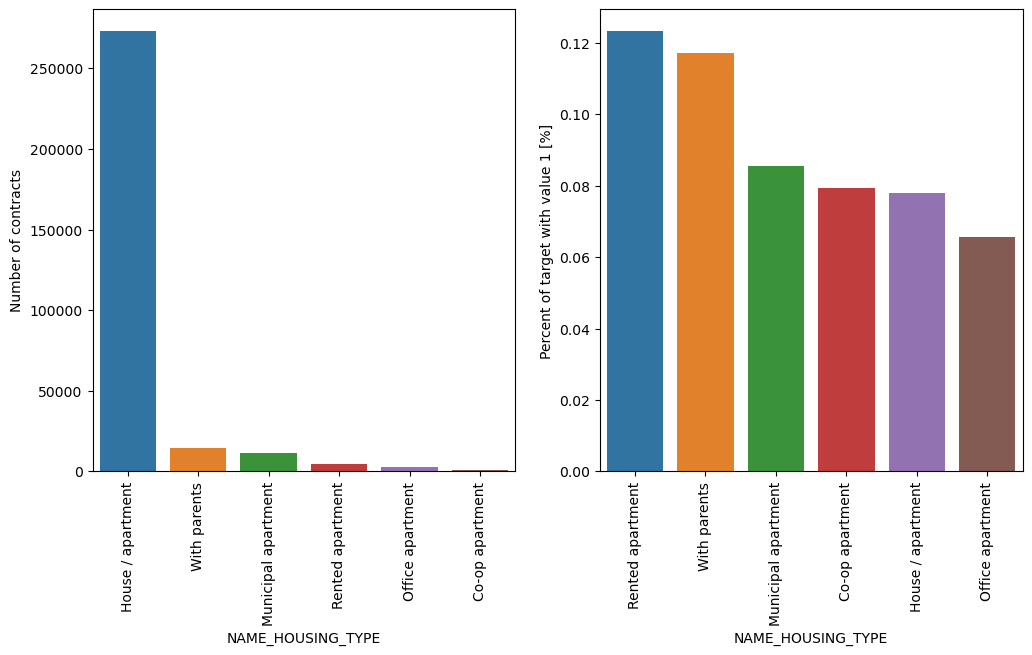

In [124]:
plot_stats('NAME_HOUSING_TYPE',True)

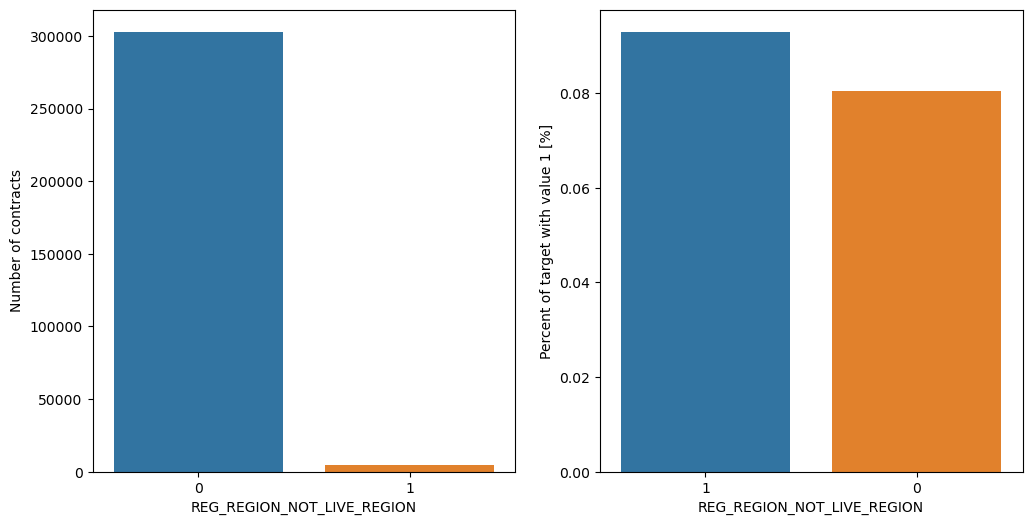

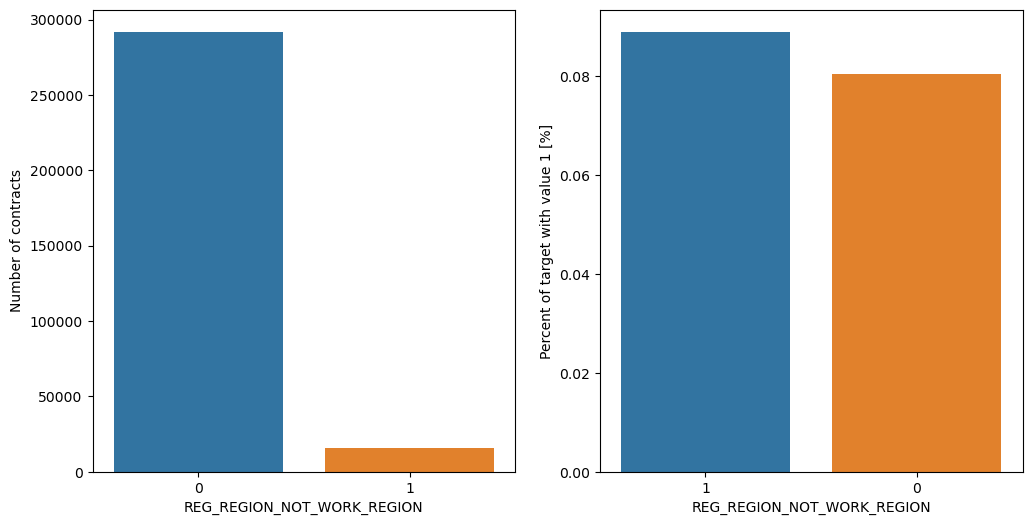

In [125]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

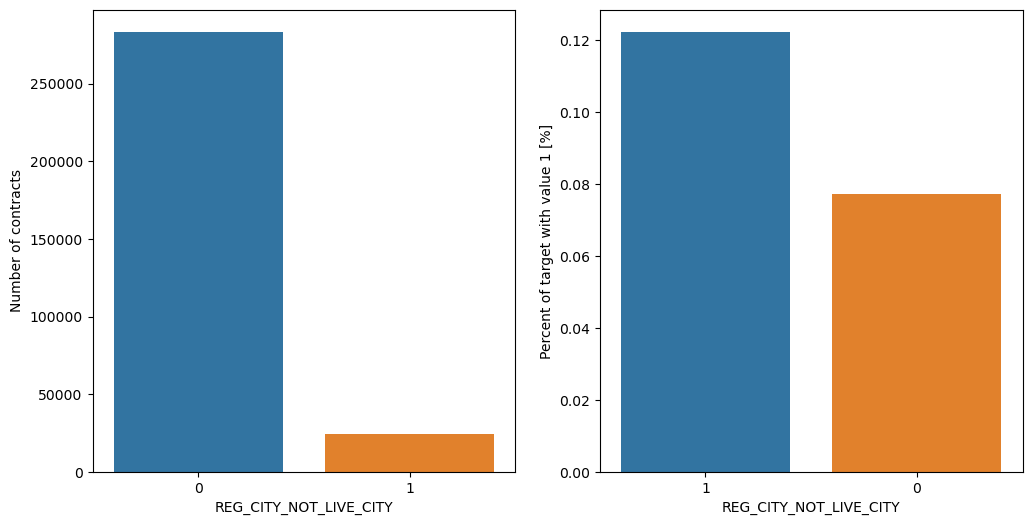

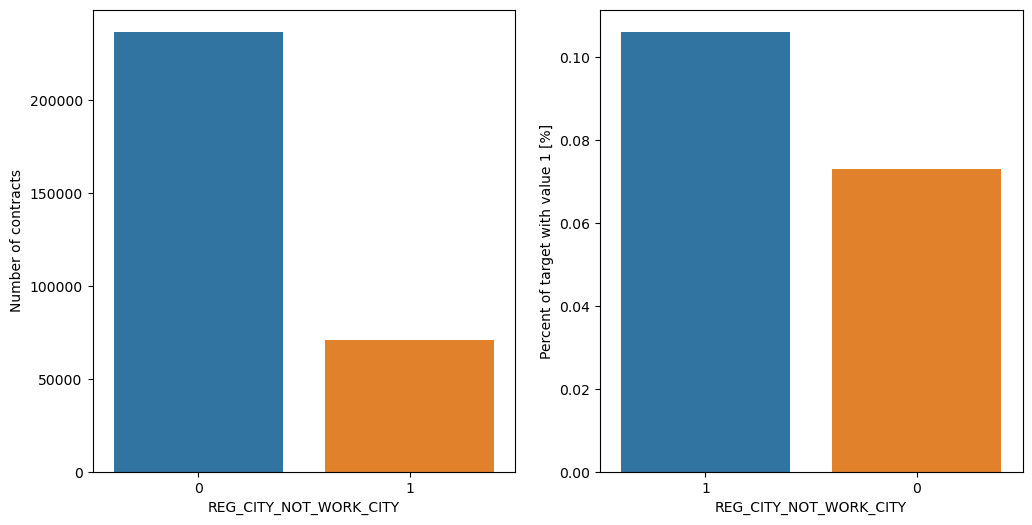

In [126]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

In [127]:
correlation_matrix = train.corr(numeric_only=True)
print(correlation_matrix)

                              TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                      1.000000      0.019187         -0.022463   
CNT_CHILDREN                0.019187      1.000000          0.028580   
AMT_INCOME_TOTAL           -0.022463      0.028580          1.000000   
AMT_CREDIT                 -0.030369      0.002145          0.412829   
AMT_ANNUITY                -0.012815      0.021377          0.484532   
...                              ...           ...               ...   
AMT_REQ_CREDIT_BUREAU_WEEK -0.001306     -0.001083          0.012408   
AMT_REQ_CREDIT_BUREAU_MON  -0.014794     -0.007983          0.075972   
AMT_REQ_CREDIT_BUREAU_QRT  -0.005833     -0.004913          0.028215   
AMT_REQ_CREDIT_BUREAU_YEAR  0.012161     -0.034874          0.063132   
SK_ID_CURR                 -0.002108     -0.001129          0.001988   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                       -0.030369    -0.012815        -0.0

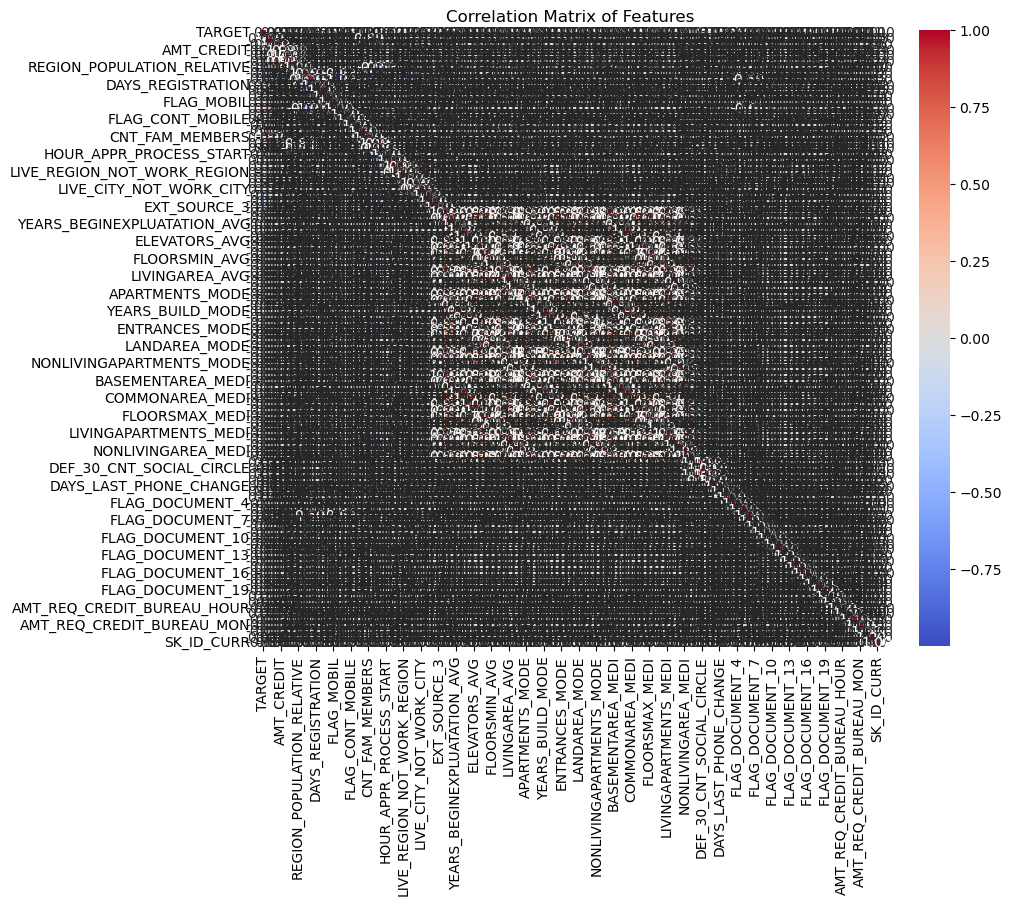

In [128]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

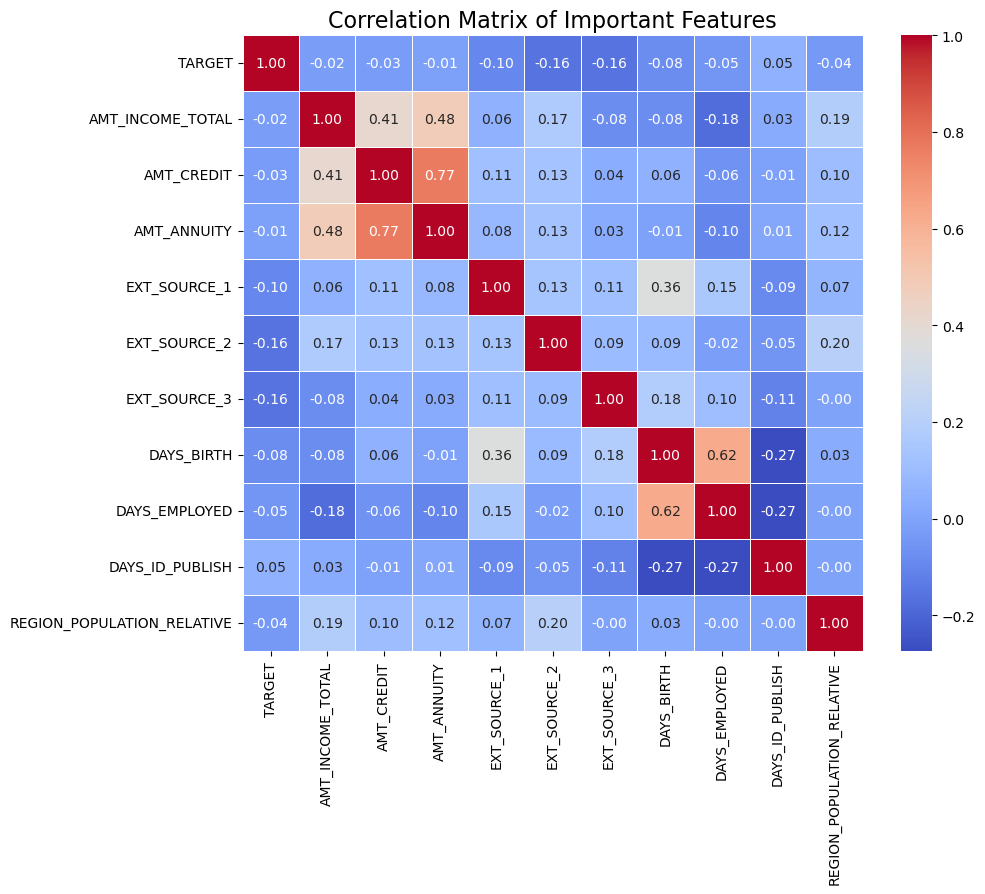

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

important_attributes = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                        'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 
                        'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REGION_POPULATION_RELATIVE']

important_data = train[important_attributes]

correlation_matrix = important_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Important Features', size=16)
plt.show()


# FEATURE ENGINEERING

In [25]:
def outliers (df, col_name):
    q1 = np.percentile(df[col_name], 25, method = 'midpoint')
    q3 = np.percentile(df[col_name], 75, method = 'midpoint')
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    df.loc[df[col_name] < lower, col_name] = lower
    df.loc[df[col_name] > upper, col_name] = upper
    return(df[col_name])



In [26]:
train['CNT_CHILDREN'] = outliers(train, 'CNT_CHILDREN')
train['AMT_CREDIT'] = outliers(train, 'AMT_CREDIT')
train['AMT_ANNUITY'] = outliers(train, 'AMT_ANNUITY')
train['AMT_GOODS_PRICE'] = outliers(train, 'AMT_GOODS_PRICE')
train['REGION_POPULATION_RELATIVE'] = outliers(train, 'REGION_POPULATION_RELATIVE')
train['DAYS_BIRTH'] = outliers(train, 'DAYS_BIRTH')
train['DAYS_EMPLOYED'] = outliers(train, 'DAYS_EMPLOYED')
train['DAYS_REGISTRATION'] = outliers(train, 'DAYS_REGISTRATION')
train['DAYS_ID_PUBLISH'] = outliers(train, 'DAYS_ID_PUBLISH')
train['OWN_CAR_AGE'] = outliers(train, 'OWN_CAR_AGE')
train['CNT_FAM_MEMBERS'] = outliers(train, 'CNT_FAM_MEMBERS')
train['EXT_SOURCE_1'] = outliers(train, 'EXT_SOURCE_1')
train['EXT_SOURCE_2'] = outliers(train, 'EXT_SOURCE_2')
train['EXT_SOURCE_3'] = outliers(train, 'EXT_SOURCE_3')
train['DAYS_LAST_PHONE_CHANGE'] = outliers(train, 'DAYS_LAST_PHONE_CHANGE')

In [27]:
#Feature Engineering for train dataset
print(np.unique(train.CODE_GENDER))
print(np.unique(train.FLAG_OWN_CAR))
print(np.unique(train.FLAG_OWN_REALTY))

['F' 'M' 'XNA']
['N' 'Y']
['N' 'Y']


In [28]:
for col in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    train[col], uniques = pd.factorize(train[col])

train = pd.get_dummies(train, columns=['CODE_GENDER'], drop_first=False)

train.head()


,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,1,Cash loans,0,0,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,1.0,100002,0,1,0
1,0,Cash loans,0,1,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,100003,1,0,0
2,0,Revolving loans,1,0,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,100004,0,1,0
3,0,Cash loans,0,0,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,1.0,100006,1,0,0
4,0,Cash loans,0,0,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,100007,0,1,0


In [29]:
train['DEBT_TO_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['AGE_TO_INCOME_RATIO'] = train['DAYS_BIRTH'] / train['AMT_INCOME_TOTAL']
train['DAYS_EMPLOYED_PERC'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']
train['INCOME_PER_PERSON'] = train['AMT_INCOME_TOTAL'] / train['CNT_FAM_MEMBERS']
train['ANNUITY_INCOME_PERC'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['PAYMENT_RATE'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,SK_ID_CURR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,DEBT_TO_INCOME_RATIO,AGE_TO_INCOME_RATIO,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,1,Cash loans,0,0,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,100002,0,1,0,2.007889,-0.046721,0.067329,202500.0,0.121978,0.060749
1,0,Cash loans,0,1,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,...,100003,1,0,0,4.790750,-0.062093,0.070862,135000.0,0.132217,0.027598
2,0,Revolving loans,1,0,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,100004,0,1,0,2.000000,-0.282163,0.011814,67500.0,0.100000,0.050000
3,0,Cash loans,0,0,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,100006,1,0,0,2.316167,-0.140778,0.159905,67500.0,0.219900,0.094941
4,0,Cash loans,0,0,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,100007,0,1,0,4.222222,-0.164049,0.152418,121500.0,0.179963,0.042623


In [30]:
#Feature Engineering for Bureau
bureau.isna().sum().to_frame().T

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,0,0,0,0,0,0,105553,633653,1124488,0,13,257669,591780,0,0,0,1226791


In [31]:
bureau.dtypes.to_frame().T

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,int64,int64,object,object,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,object,int64,float64


In [32]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [31]:
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum']}
bur_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations})
bur_agg.columns = pd.Index(['BUR_' + e[0] + "_" + e[1].upper() for e in bur_agg.columns.tolist()])
bur_agg.head()

,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_DAYS_CREDIT_UPDATE_MEAN,BUR_CREDIT_DAY_OVERDUE_MAX,BUR_CREDIT_DAY_OVERDUE_MEAN,...,BUR_AMT_CREDIT_SUM_SUM,BUR_AMT_CREDIT_SUM_DEBT_MAX,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_DEBT_SUM,BUR_AMT_CREDIT_SUM_OVERDUE_MEAN,BUR_AMT_CREDIT_SUM_LIMIT_MEAN,BUR_AMT_CREDIT_SUM_LIMIT_SUM,BUR_AMT_ANNUITY_MAX,BUR_AMT_ANNUITY_MEAN,BUR_CNT_CREDIT_PROLONG_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,1453365.000,373239.0,85240.928571,596686.5,0.0,0.00000,0.000,10822.5,3545.357143,0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,865055.565,245781.0,49156.200000,245781.0,0.0,7997.14125,31988.565,0.0,0.000000,0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,1017400.500,0.0,0.000000,0.0,0.0,202500.00000,810000.000,NaN,NaN,0
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,189037.800,0.0,0.000000,0.0,0.0,0.00000,0.000,NaN,NaN,0
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,657126.000,543087.0,189469.500000,568408.5,0.0,0.00000,0.000,4261.5,1420.500000,0


In [32]:
closed = bureau[bureau['CREDIT_ACTIVE'] == 'Closed']
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bur_agg = bur_agg.join(closed_agg, how='left', on='SK_ID_CURR')
bur_agg.head()

,BUR_DAYS_CREDIT_MIN,BUR_DAYS_CREDIT_MAX,BUR_DAYS_CREDIT_MEAN,BUR_DAYS_CREDIT_VAR,BUR_DAYS_CREDIT_ENDDATE_MIN,BUR_DAYS_CREDIT_ENDDATE_MAX,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_DAYS_CREDIT_UPDATE_MEAN,BUR_CREDIT_DAY_OVERDUE_MAX,BUR_CREDIT_DAY_OVERDUE_MEAN,...,CLOSED_AMT_CREDIT_SUM_SUM,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,569340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,383067.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,207400.5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,189037.8,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,58500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Feature Engineering for Bureau Balance
bureau_balance.isna().sum().to_frame().T

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,0,0,0


In [34]:
bureau_balance.dtypes.to_frame().T

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,int64,int64,object


In [35]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [36]:
bb_aggregations = {'MONTHS_BALANCE': ['min', 'mean', 'max', 'size']}
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bb_agg.head()

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE
SK_ID_BUREAU,,,,
5001709,-96,-48.0,0,97
5001710,-82,-41.0,0,83
5001711,-3,-1.5,0,4
5001712,-18,-9.0,0,19
5001713,-21,-10.5,0,22


In [37]:
#Feature Engineering for Credit Card Balance
credit_card_balance.isna().sum().to_frame().T

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,0,0,0,0,749816,0,749816,749816,305236,...,0,0,749816,0,749816,749816,305236,0,0,0


In [38]:
credit_card_balance.dtypes.to_frame().T

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,...,float64,float64,float64,int64,float64,float64,float64,object,int64,int64


In [39]:
credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [40]:
cred_aggregations = {'MONTHS_BALANCE': ['min', 'mean', 'max'],
                    'AMT_BALANCE': ['min', 'mean', 'max']}
cred_agg = credit_card_balance.groupby('SK_ID_CURR').agg(cred_aggregations)
cred_agg.columns = pd.Index(['CRED_' + e[0] + "_" + e[1].upper() for e in cred_agg.columns.tolist()])

cred_agg['CRED_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
cred_agg.head()

,CRED_MONTHS_BALANCE_MIN,CRED_MONTHS_BALANCE_MEAN,CRED_MONTHS_BALANCE_MAX,CRED_AMT_BALANCE_MIN,CRED_AMT_BALANCE_MEAN,CRED_AMT_BALANCE_MAX,CRED_COUNT
SK_ID_CURR,,,,,,,
100006,-6,-3.5,-1,0.0,0.000000,0.00,6
100011,-75,-38.5,-2,0.0,54482.111149,189000.00,74
100013,-96,-48.5,-1,0.0,18159.919219,161420.22,96
100021,-18,-10.0,-2,0.0,0.000000,0.00,17
100023,-11,-7.5,-4,0.0,0.000000,0.00,8


In [41]:
#Feature Engineering for Installments Payments
installments_payments.isna().sum().to_frame().T

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,0,0,0,0,0,2905,0,2905


In [42]:
installments_payments.dtypes.to_frame().T

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,int64,int64,float64,int64,float64,float64,float64,float64


In [43]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [44]:
installments_payments['PAYMENT_PERC'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']
installments_payments['DPD'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['DBD'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['DPD'] = installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
installments_payments['DBD'] = installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)

inst_aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']}
inst_agg = installments_payments.groupby('SK_ID_CURR').agg(inst_aggregations)
inst_agg.columns = pd.Index(['INST_' + e[0] + "_" + e[1].upper() for e in inst_agg.columns.tolist()])

inst_agg['INST_COUNT'] =  installments_payments.groupby('SK_ID_CURR').size()
inst_agg.head()

,INST_NUM_INSTALMENT_VERSION_NUNIQUE,INST_DPD_MAX,INST_DPD_MEAN,INST_DPD_SUM,INST_DBD_MAX,INST_DBD_MEAN,INST_DBD_SUM,INST_PAYMENT_PERC_MAX,INST_PAYMENT_PERC_MEAN,INST_PAYMENT_PERC_SUM,...,INST_AMT_INSTALMENT_MEAN,INST_AMT_INSTALMENT_SUM,INST_AMT_PAYMENT_MIN,INST_AMT_PAYMENT_MAX,INST_AMT_PAYMENT_MEAN,INST_AMT_PAYMENT_SUM,INST_DAYS_ENTRY_PAYMENT_MAX,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_SUM,INST_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,2,11.0,1.571429,11.0,36.0,8.857143,62.0,1.0,1.0,7.0,...,5885.132143,41195.925,3951.000,17397.900,5885.132143,41195.925,-1628.0,-2195.000000,-15365.0,7
100002,2,0.0,0.000000,0.0,31.0,20.421053,388.0,1.0,1.0,19.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19
100003,2,0.0,0.000000,0.0,14.0,7.160000,179.0,1.0,1.0,25.0,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25
100004,2,0.0,0.000000,0.0,11.0,7.666667,23.0,1.0,1.0,3.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3
100005,2,1.0,0.111111,1.0,37.0,23.666667,213.0,1.0,1.0,9.0,...,6240.205000,56161.845,4813.200,17656.245,6240.205000,56161.845,-470.0,-609.555556,-5486.0,9


In [45]:
#Feature Engineering for Previous Application
previous_application.isna().sum().to_frame().T

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,0,0,372235,0,1,895844,385515,0,0,...,0,372230,0,346,673065,673065,673065,673065,673065,673065


In [46]:
previous_application.dtypes.to_frame().T

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,int64,int64,object,float64,float64,float64,float64,float64,object,int64,...,object,float64,object,object,float64,float64,float64,float64,float64,float64


In [47]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [48]:

previous_application['APP_CREDIT_PERC'] = previous_application['AMT_APPLICATION'] /previous_application['AMT_CREDIT']

prev_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum']}
prev_agg = previous_application.groupby('SK_ID_CURR').agg(prev_aggregations)
prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

approved = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved']
approved_agg = approved.groupby('SK_ID_CURR').agg(prev_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

refused =  previous_application[ previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
refused_agg = refused.groupby('SK_ID_CURR').agg(prev_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
prev_agg.head()

,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MIN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MIN,...,REFUSED_HOUR_APPR_PROCESS_START_MAX,REFUSED_HOUR_APPR_PROCESS_START_MEAN,REFUSED_RATE_DOWN_PAYMENT_MIN,REFUSED_RATE_DOWN_PAYMENT_MAX,REFUSED_RATE_DOWN_PAYMENT_MEAN,REFUSED_DAYS_DECISION_MIN,REFUSED_DAYS_DECISION_MAX,REFUSED_DAYS_DECISION_MEAN,REFUSED_CNT_PAYMENT_MEAN,REFUSED_CNT_PAYMENT_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,1.044079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,0.868825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,1.207699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,1.111173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Feature Engineering for POS Cash Balance
POS_CASH_balance.isna().sum().to_frame().T

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,0,0,26071,26087,0,0,0


In [50]:
POS_CASH_balance.dtypes.to_frame().T

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,int64,int64,int64,float64,float64,object,int64,int64


In [51]:
POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [52]:
pos_aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']}
pos_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg(pos_aggregations)
pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

pos_agg['POS_COUNT'] = POS_CASH_balance.groupby('SK_ID_CURR').size()
pos_agg.head()

,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_COUNT
SK_ID_CURR,,,,,,,,
100001,-53,-72.555556,9,7,0.777778,7,0.777778,9
100002,-1,-10.000000,19,0,0.000000,0,0.000000,19
100003,-18,-43.785714,28,0,0.000000,0,0.000000,28
100004,-24,-25.500000,4,0,0.000000,0,0.000000,4
100005,-15,-20.000000,11,0,0.000000,0,0.000000,11
